# Salary Prediction | K-NEAREST NEIGHBOUR model | Logistic Regression | Support Vector Machine

### *Importing Libraries*

In [27]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

### *Choose Dataset from Local Directory*

In [28]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary (1).csv


### *Load Dataset*

In [30]:
dataset = pd.read_csv('salary.csv')

### *Summarize Dataset*


In [31]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
                age  education.num  capital.gain  hours.per.week
count  32561.000000   32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844       40.437456
std       13.640433       2.572720   7385.292085       12.347429
min       17.000000       1.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000       99.000000


### *Mapping Salary Data to Binary Value*

In [32]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


###For plotting of Data in form of graph

In [35]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

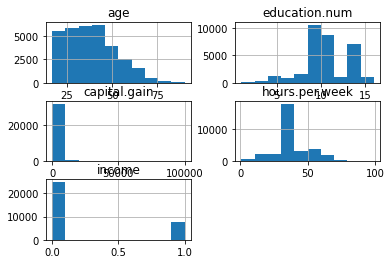

In [36]:
#Histogram printing
dataset.hist()
pyplot.title("Histogram plot")
pyplot.show()

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [42]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [43]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### *Splitting Dataset into Train & Test*

In [44]:
# We used Supervised Learning's these three Algorithms:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
#Support Vector Machine
from sklearn.svm import SVC

# these are evaluation methods loading
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

### *Finding the Best K-Value*

Text(0, 0.5, 'Mean Error')

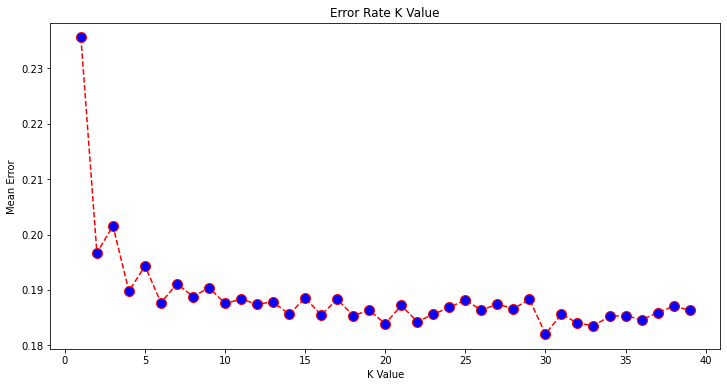

In [47]:
error = []
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### *Training*

In [48]:
#Using KNeighbors
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### *Predicting, salary of new Employee*

In [50]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 39
Enter New Employee's Education: 10
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 36
[0]
Customer might not got  Salary above 50K


### *Prediction for all Test Data*

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### *Evaluating Model - CONFUSION MATRIX*

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5918  275]
 [1326  622]]
Accuracy of the Model: 80.33411128853949%


##For Comparison between the three algorithms using graph

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.809992 (0.002621)
KNN: 0.797011 (0.003726)
SVM: 0.821622 (0.001392)


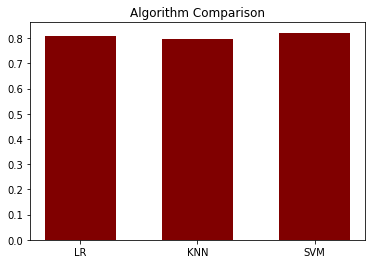

This is my dataset
       age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]


In [ ]:
results = []
names = []
res = []
for name1, model in models:
  kfold = StratifiedKFold(n_splits=2, random_state=None)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name1)
  res.append(cv_results.mean())
  print('%s: %f (%f)'%(name1, cv_results.mean(), cv_results.std()))

#pyplot.ylim(.990, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()
print('This is my dataset')
print(dataset)